In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as scp 
import sympy as sp 
import numpy.linalg as LA 
import scipy.linalg as SLA 

from scipy import optimize 
from scipy import integrate



In [ ]:
x = sp.Symbol('x')

exp1 = sp.sqrt(1 + 4*x)
print(sp.integrate(exp1, (x, 0, 1)).evalf())
exp2 = sp.exp(-x) * sp.sin(x)

print(sp.integrate(exp2, (x, 0, sp.oo)))

In [ ]:
exp = x**3 - 4*x**2 + 6*x - 8 
print(sp.solve(exp)[2].evalf())
def equation(x):
    return x**3 - 4*x**2 + 6*x - 8
print(scp.optimize.fsolve(equation, 1))



In [ ]:
x, y = sp.symbols("x y")

exp1 = x**2 - y - x - 3
exp2 = x + 3*y - 6

roots = sp.solve((exp1, exp2), (x, y))
print(roots)

def equas(vars):
    x, y = vars
    eq1 = x**2 - y - x - 3
    eq2 = x + 3*y - 6
    return [eq1, eq2]
print(optimize.fsolve(equas, [1, 1]))

In [ ]:
# 3.4
y = sp.symbols('y', cls=sp.Function)

eq = sp.diff(y(x), x, 2) + y(x) - x*sp.cos(2*x)

print(sp.dsolve(eq, y(x), ics={y(0): 1, y(2):3}))

In [ ]:
# 3.5
# 分块矩阵的组合 -> 使用numpy.block()函数
a1 = np.arange(1, 7).reshape(3, -1)
a2 = np.tile(np.arange(1, 4), (1, 2)).reshape(2, -1).transpose()
a2[2, 1] = 4
a3 = np.array([2, 6])
a4 = np.array([3, 2])
block = np.block([[a1, a2], [a3, a4]])
print(block)
print(LA.det(block))

In [ ]:
# 3，6 解方程组
a = np.array([[1, 2, 1, -1], [3, 6, -1, -3], [5, 10, 1, -5]])
print(SLA.null_space(a))

# 非齐次线性方程组的解法：  
a = np.array([[2, 1, -1, 1], [4, 2, -2, 1], [2, 1, -1, -1]])
b = np.array([1, 2, 1])
print(LA.pinv(a) @ b)

In [ ]:
# 3.9 不会，抄答案吧
a, b = sp.symbols("a b")
f1 = sp.Matrix([[1, a + 1, 1], [a + 1, 1, b], [1, b, 1]])


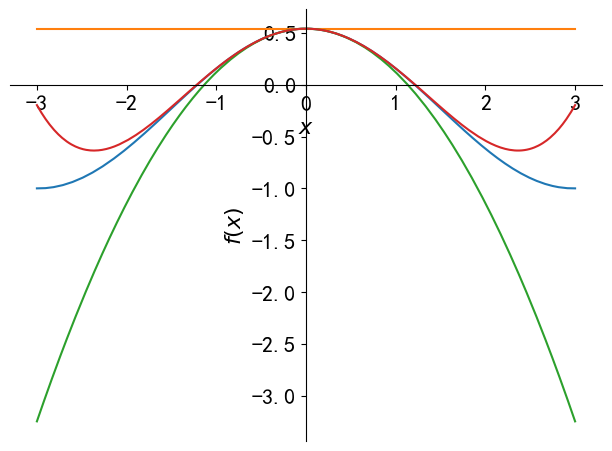

In [50]:
# 3.10

x, y = sp.symbols("x y")
y = sp.cos(sp.sqrt(x**2 + 1))

sp.plot(
    y,
    y.series(x, 0, 1).removeO(),
    y.series(x, 0, 3).removeO(),
    y.series(x, 0, 5).removeO(),
    (x, -3, 3),
)


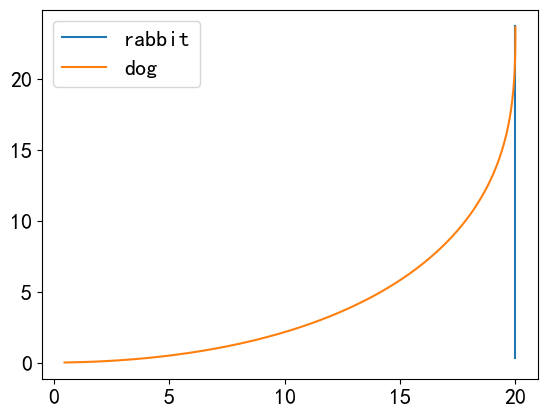

7.907907907907909


In [16]:
# 3.11
vr = 3
vd = 4.5
dr = np.array([0, 1])
pri = np.array([20, 0])
pdi = np.array([0, 0])
eps = 5e-2

T = np.linspace(0, 100, 1000)
dt = T[1] - T[0]

def get_len(p1, p2):
    return LA.norm(p2 - p1)

pr = pri.copy()
pd = pdi.copy()

trace_r = []
trace_d = []
cnt = 0
while(get_len(pr, pd) >= eps and cnt < 1000):
    pr = pr + vr * dt * dr / LA.norm(dr)
    dd = (pr - pd) / LA.norm(pr - pd)
    pd = pd + vd * dt * dd
    trace_r.append(pr)
    trace_d.append(pd)
    cnt += 1

trace_r = np.concatenate(trace_r).reshape(-1, 2).transpose(1, 0)
trace_d = np.concatenate(trace_d).reshape(-1, 2).transpose(1, 0)
# print(trace_r)

line_r = np.array(trace_r)
line_d = np.array(trace_d)
plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False)

plt.plot(line_r[0], line_r[1], label='rabbit')
plt.plot(line_d[0], line_d[1], label='dog')

plt.legend()
plt.show()
print(cnt * dt)


In [28]:
# 3.12 求积分的数值解

f1 = lambda x: np.exp(-x) * np.sin(np.sqrt(x**2 + 2))
print(integrate.quad(f1, 0, sp.oo)[0])

f2 = lambda x, y: x**2 + 2 * y**2
y = sp.symbols("y")
ran = sp.solve(y**2 - y - 2, y)
print(integrate.dblquad(f2, *ran, lambda y: y**2, lambda y: y + 2)[0])

f3 = lambda x, y, z: x 
zbd = [0, 4]
ybd = lambda z: np.sqrt(z)
xbd = lambda z, y: np.sqrt(z - y**2)
print(integrate.tplquad(f3, *zbd, lambda x: -ybd(x), ybd, lambda y, x: -xbd(y, x), xbd))




0.8328534212790222
21.407142857142855
(0.0, 4.4147289315873426e-14)


In [30]:
# 3.13

f = lambda x: 2 * np.exp(-x) * np.sin(x)
xmin = optimize.fminbound(f, 0, 3)
xmax = optimize.fminbound(lambda x: -f(x), 0, 3)
print(xmin, xmax)

2.9999965472915386 0.7853986146616215


In [ ]:
# 3.14

